# Features Extraction and Feature Selection

youtube.com/watch?v=uMlU2JaiOd8&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH  - Very Important

In [ ]:
#https://github.com/rimanshu/Machine-Learning-with-Python
#https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/
#https://towardsdatascience.com/multi-class-text-classification-with-sklearn-and-nltk-in-python-a-software-engineering-use-case-779d4a28ba5

#Scaling Technique
#https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/?utm_source=KJLinkedin&utm_medium=post&utm_campaign=28_july_intermediate-article

Feature Extraction

In [ ]:
#https://www.youtube.com/watch?v=7YacOe4XwhY
#https://www.youtube.com/watch?v=FrmrHyOSyhE
#Document - It refers to single peice of text information. This could be a text message, tweets, email, books etc
#This refers to one row or observation

#corpus - This is collection of observation. This would be equivalent to whole dataset of rows and observation.

#Tokens - This is word, phrase, symboles drived from document through the process of tokenization. Example - How are you
# Tokens would be - "How" , "are" , "you"

#Count Vectorizer - takes whats called bag of words approach. Each message is seperated into tokens and the number of times
#each tokens occurs in a message is counted. It will represent text into metrics

#TF-IDF - Product of term frefquency and inverse document frequency.

#Term Frequency is a weight representing how often a word occurs in a document. If we have several occurances of the same
#word in one document we can expect the TF-IDF to increase.

#Inverse document frequency is another weight representing how common a word it accross documentS. If a word is used in many docuemnt 
#then TF-IDF increases.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


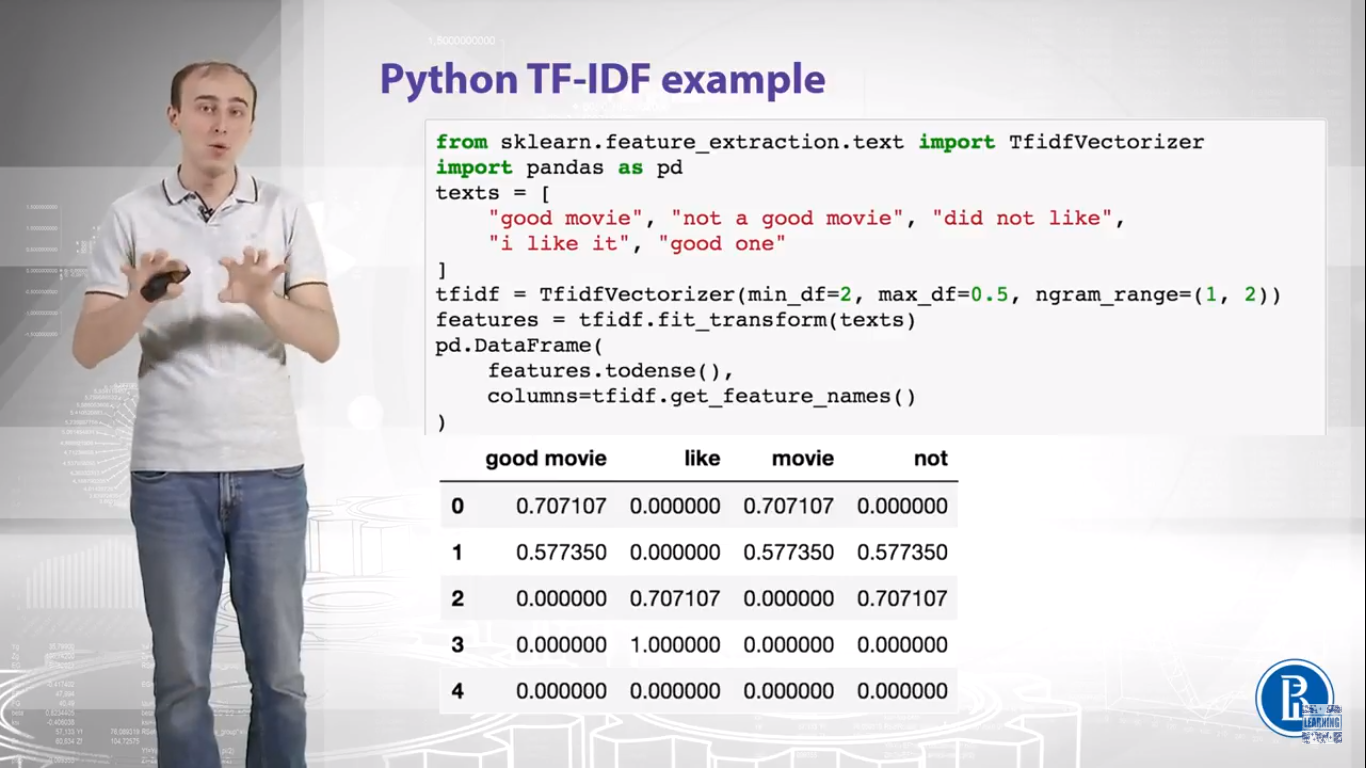

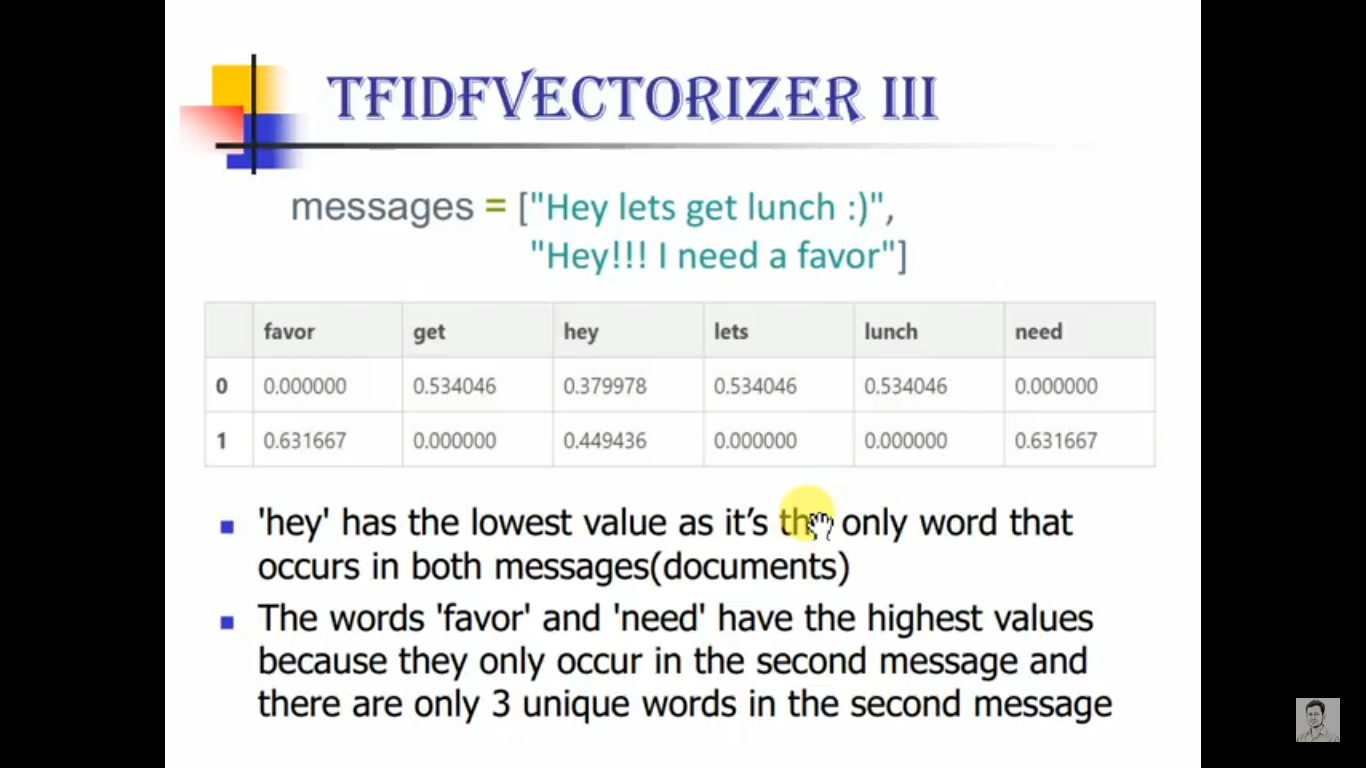

In [ ]:
#https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#https://hub.packtpub.com/4-ways-implement-feature-selection-python-machine-learning/

# Top reasons to use feature selection are:

# It enables the machine learning algorithm to train faster.
# It reduces the complexity of a model and makes it easier to interpret.
# It improves the accuracy of a model if the right subset is chosen.
# It reduces overfitting.

#we will look at different methods to select features from the dataset; and discuss types of feature selection algorithms 
#with their implementation in Python using the Scikit-learn (sklearn) library:

# Univariate selection
# Recursive Feature Elimination (RFE)
# Principle Component Analysis (PCA)
# Choosing important features (feature importance)

# Univariate selection
# Statistical tests can be used to select those features that have the strongest relationships with the output variable.

# The scikit-learn library provides the SelectKBest class, which can be used with a suite of different statistical tests to 
# select a specific number of features.

Mutual_info_classif and Mutual_info_regression - based on information gain.

from sklearn.feature_selection import SelectKBest
#We will select the features using chi square
test = SelectKBest(score_func=chi2, k=4)
#Fit the function for ranking the features by score
fit = test.fit(X, Y)
#Summarize scores numpy.set_printoptions(precision=3) print(fit.scores_)
features = fit.transform(X)

# Recursive Feature Elimination
# RFE works by recursively removing attributes and building a model on attributes that remain. It uses model accuracy to ident0ify 
# which attributes (and combinations of attributes) contribute the most to predicting the target attribute. You can learn more 
#about the RFE class in the scikit-learn documentation.

# The following example uses RFE with the logistic regression algorithm to select the top three features. The choice of 
#algorithm 
# does not matter too much as long as it is skillful and consistent:

#Import sklearn's feature selection algorithm from sklearn.feature_selection import RFE
#Import LogisticRegression for performing chi square test from sklearn.linear_model import LogisticRegression
#Feature extraction

# model = LogisticRegression() rfe = RFE(model, 3)
# fit = rfe.fit(X, Y)
# print("Num Features: %d"% fit.n_features_) print("Selected Features: %s"% fit.support_) 
#print("Feature Ranking: %s"% fit.ranking_)

# After Execution
# Num Features: 3

# Selected Features: [ True False False False False   True  True False]

# Feature Ranking: [1 2 3 5 6 1 1 4]

# Principle Component Analysis
# PCA uses linear algebra to transform the dataset into a compressed form. Generally, it is considered a data reduction technique. 
# A property of PCA is that you can choose the number of dimensions or principal components in the transformed result.

#from sklearn.decomposition import PCA

#Feature extraction

# pca = PCA(n_components=3) fit = pca.fit(X)

# #Summarize components

# print("Explained Variance: %s") % fit.explained_variance_ratio_

# print(fit.components_)

# Choosing important features (feature importance)
# Feature importance is the technique used to select features using a trained supervised classifier. When we train a classifier 
# such as a decision tree, we evaluate each attribute to create splits; we can use this measure as a feature selector. Let’s understand it in detail.

# Random forests are among the most popular machine learning methods thanks to their relatively good accuracy, robustness, and 
# ease of use. They also provide two straightforward methods for feature selection—mean decrease impurity and mean decrease 
# accuracy.

# A random forest consists of a number of decision trees. Every node in a decision tree is a condition on a single feature, 
# designed to split the dataset into two so that similar response values end up in the same set. The measure based on which 
# the (locally) optimal condition is chosen is known as impurity. For classification, it is typically either the Gini

# impurity or information gain/entropy, and for regression trees, it is the variance. Thus when training a tree, 
# it can be computed by how much each feature decreases the weighted impurity in a tree. For a forest, the impurity 
# decrease from each feature can be averaged and the features are ranked according to this measure.

##Import Random Forest classifier class from sklearn

# from sklearn.ensemble import RandomForestClassifier

# #Import feature selector class select model of sklearn

#         from sklearn.feature_selection

#         import SelectFromModel

#          np.random.seed(1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Scorxe'))  #print 10 best features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

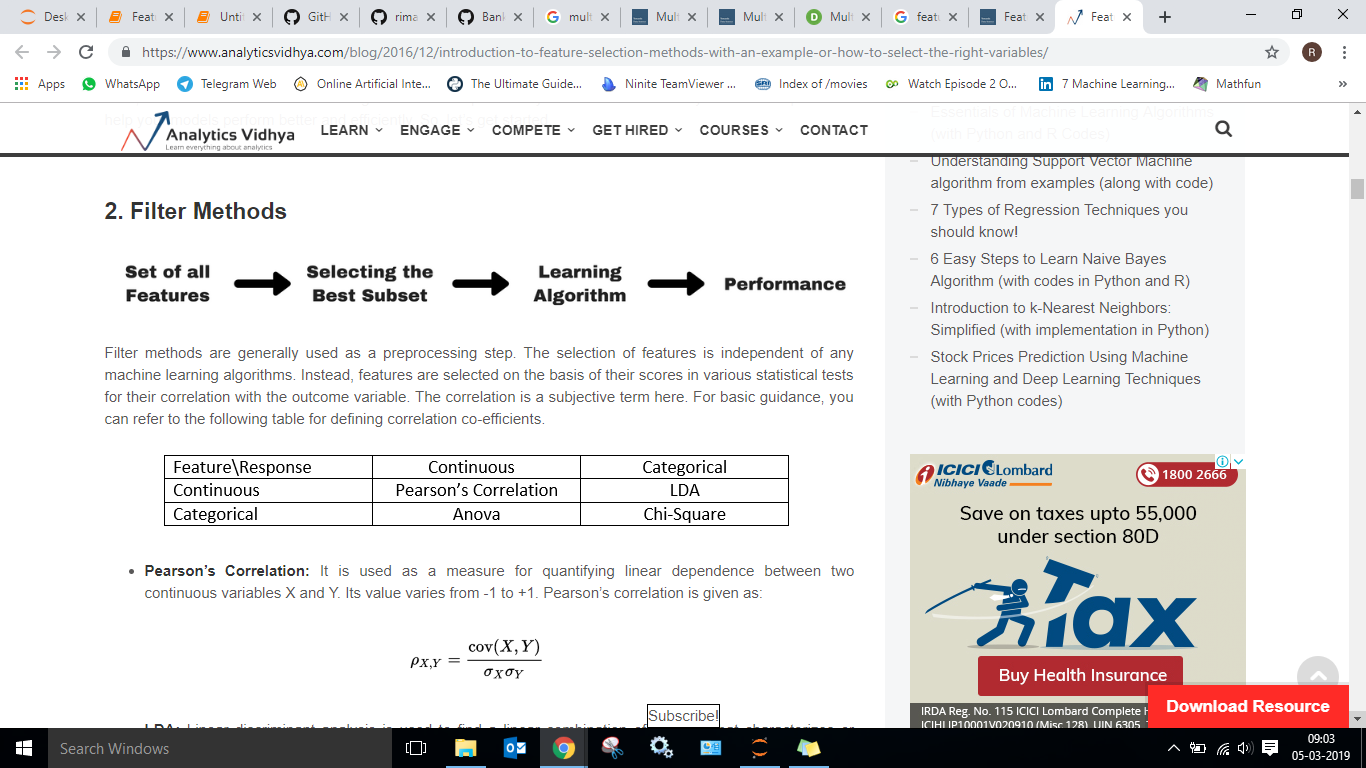

In [ ]:
#Annova Test - #https://www.youtube.com/watch?v=-yQb_ZJnFXw

# We can use mean normal distribution to make confidence interval. If there is diff b/w of mean of two samples than it is called 
#t test while annova is diff among the mean of three or more samples.

In [8]:
from sklearn.feature_selection import *